In [1]:
import plotly
import plotly.offline as pyo
from plotly.offline import iplot
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import plotly.graph_objects as go

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# file_name = 'Food_Inspections.csv'
df = pd.read_csv('/content/drive/MyDrive/Final_Project_602/Food_Inspections.csv')

In [5]:
# Display the first few rows of the DataFrame
df.head()


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2586057,ANGELINA RISTORANTE,ANGELINA RISTORANTE,14788.0,Restaurant,Risk 1 (High),3561 N BROADWAY,CHICAGO,IL,60657.0,11/30/2023,Canvass Re-Inspection,Pass,NaN,41.947205,-87.647027,"(41.94720549468551, -87.64702664696026)"
1,2586039,RIVERSIDE MARKET,RIVERSIDE MARKET,2934974.0,Grocery Store,Risk 1 (High),1240 N HALSTED ST,Chicago,IL,60642.0,11/30/2023,License,Not Ready,NaN,41.904707,-87.648270,"(41.904706963144406, -87.64827036474287)"
2,2586041,RIVERSIDE MARKET,RIVERSIDE MARKET,2934975.0,Grocery Store,Risk 3 (Low),1240 N HALSTED ST,Chicago,IL,60642.0,11/30/2023,License,Not Ready,NaN,41.904707,-87.648270,"(41.904706963144406, -87.64827036474287)"
3,2586011,PILSEN YARDS,PILSEN YARDS/THE ALDERMAN,2548908.0,Restaurant,Risk 1 (High),1159-1163 W 18TH ST,CHICAGO,IL,60608.0,11/29/2023,Canvass Re-Inspection,Fail,60. PREVIOUS CORE VIOLATION CORRECTED - Commen...,41.857859,-87.655509,"(41.8578590994683, -87.65550935859257)"
4,2585952,MS. B'S KITCHEN & CATERING LLC,MS. B'S KITCHEN & CATERING,2631695.0,Restaurant,Risk 1 (High),4203 W CERMAK RD,CHICAGO,IL,60623.0,11/29/2023,Canvass,Out of Business,NaN,41.851366,-87.729766,"(41.8513662093141, -87.72976631700914)"


In [ ]:
# Information of the datafset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264030 entries, 0 to 264029
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    264030 non-null  int64  
 1   DBA Name         264030 non-null  object 
 2   AKA Name         261550 non-null  object 
 3   License #        264022 non-null  float64
 4   Facility Type    258918 non-null  object 
 5   Risk             263951 non-null  object 
 6   Address          264030 non-null  object 
 7   City             263845 non-null  object 
 8   State            263971 non-null  object 
 9   Zip              263948 non-null  float64
 10  Inspection Date  264030 non-null  object 
 11  Inspection Type  264029 non-null  object 
 12  Results          264030 non-null  object 
 13  Violations       191759 non-null  object 
 14  Latitude         263128 non-null  float64
 15  Longitude        263128 non-null  float64
 16  Location         263128 non-null  obje

Cleaning data with NULL Values

In [ ]:
# Calculating the total count of missing values in each column
df.isna().sum()

# Calculating the percentage of missing values in each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Filtering columns with one or more null values
columns_with_missing_data = missing_percentage[missing_percentage > 0]

# Displaying the result
print(columns_with_missing_data)

AKA Name            0.939287
License #           0.003030
Facility Type       1.936144
Risk                0.029921
City                0.070068
State               0.022346
Zip                 0.031057
Inspection Type     0.000379
Violations         27.372268
Latitude            0.341628
Longitude           0.341628
Location            0.341628
dtype: float64


# Data Analysis

Analysing the data "Results of Inspection"

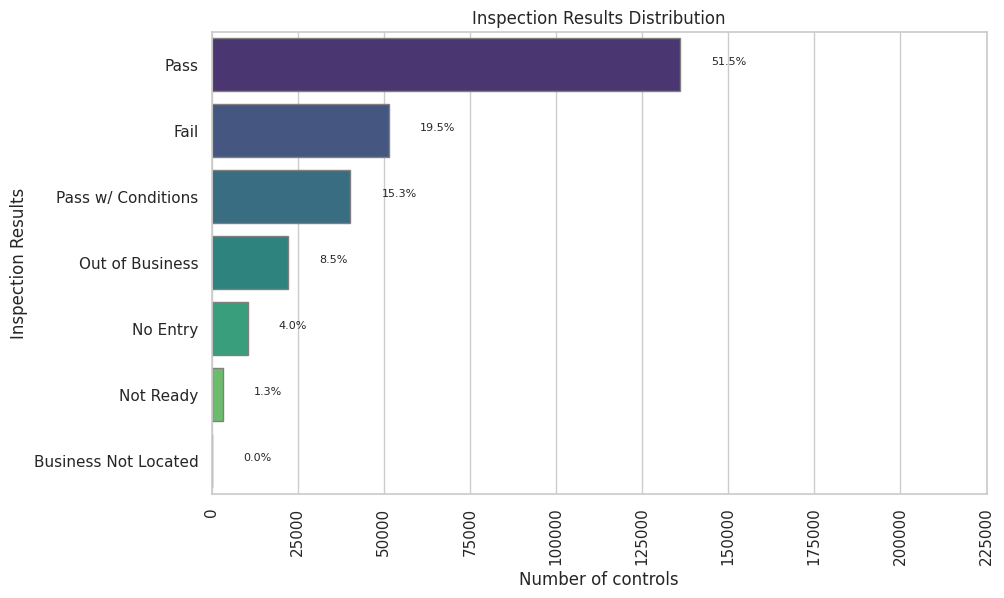

In [ ]:
df1 = pd.DataFrame(df['Results'].value_counts()).reset_index()
df1.columns = ['Var1', 'Freq']
df1 = df1.sort_values(by='Freq', ascending=False)

# Plotting with a different color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Freq', y='Var1', data=df1, palette='viridis', edgecolor='grey')  # Change 'viridis' to your preferred color palette
plt.xlabel('Number of controls')
plt.ylabel('Inspection Results')
plt.title('Inspection Results Distribution')

# Adding percentage labels
total_records = len(df)
for i, (value, freq) in enumerate(df1.iterrows()):
    plt.text(freq['Freq'] + 9000, i, f"{round(freq['Freq']/total_records * 100, 1)}%", size=8)

# Setting x-axis limit and y-axis limit
plt.xlim(0, 225000)
plt.xticks(rotation=90)

# Show plot
plt.show()

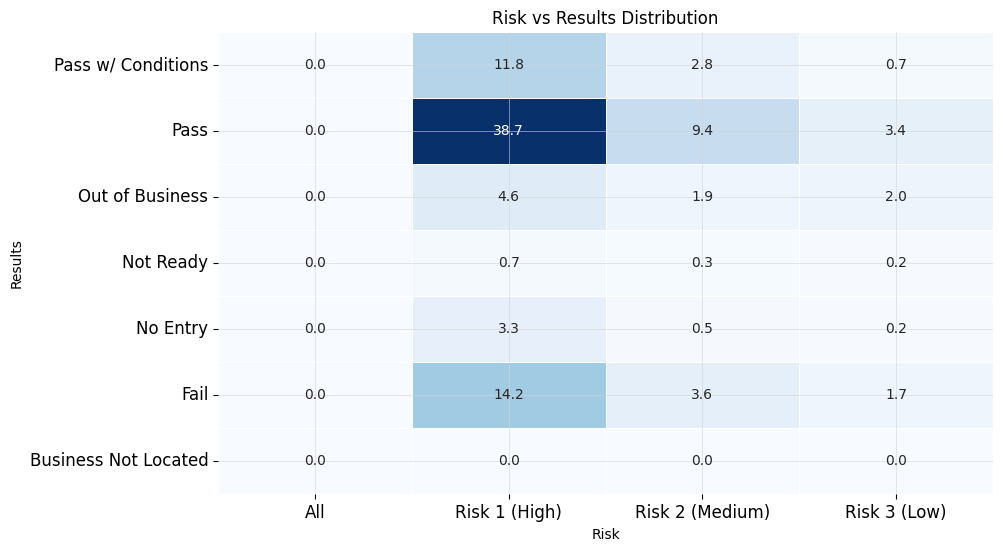

In [ ]:
df3 = df.groupby(['Risk', 'Results']).size().reset_index(name='Count')

# Pivot the DataFrame for better visualization
pivot_df = df3.pivot('Results', 'Risk', 'Count').fillna(0)

# Calculate percentages
total_records = len(df)
percentage_df = (pivot_df / total_records) * 100

# Plotting
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(percentage_df, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar=False)
heatmap.set_xlabel('Risk')
heatmap.set_ylabel('Results')
plt.title('Risk vs Results Distribution')

# Customizing plot appearance
plt.xticks(size=12, color='black')
plt.yticks(size=12, color='black')
plt.gca().invert_yaxis()  # Invert y-axis to have 'Results' at the top
plt.grid(linewidth=0.4, color='lightgrey')

# Show plot
plt.show()

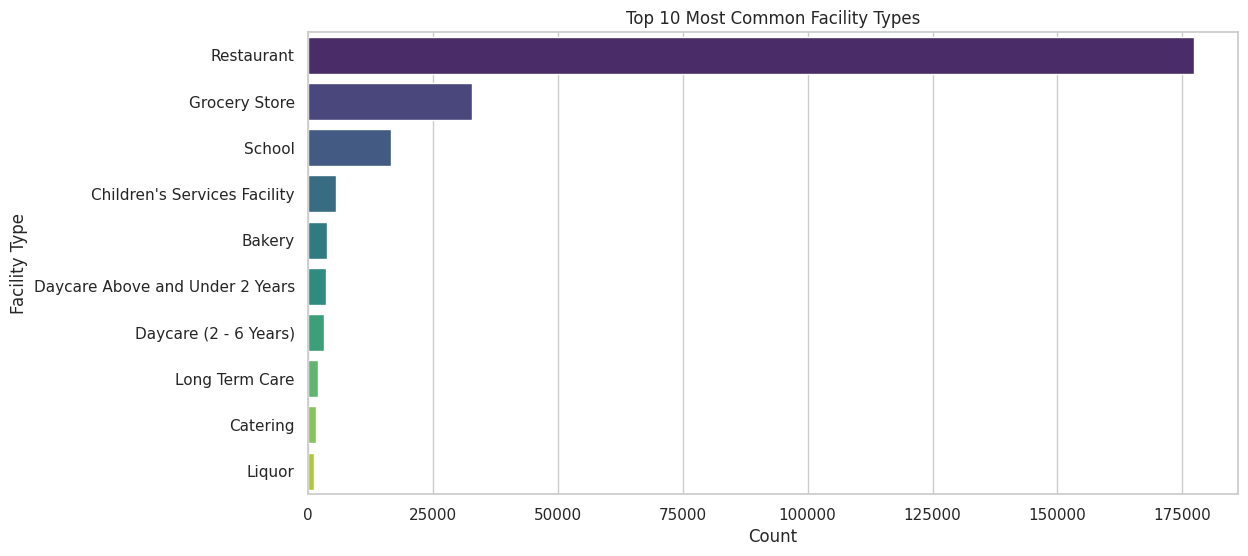

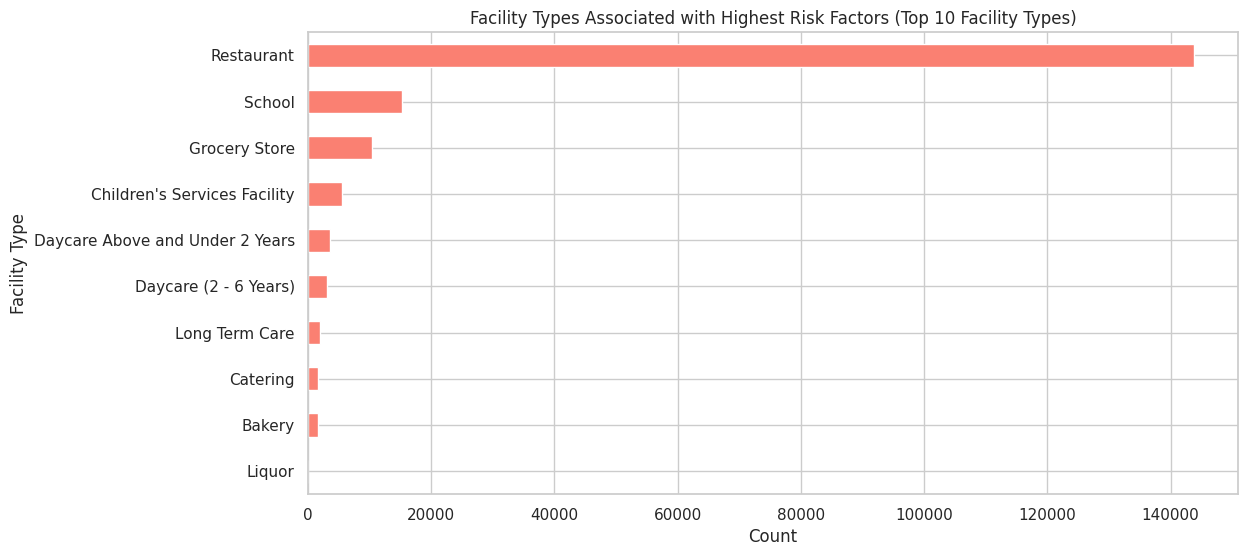

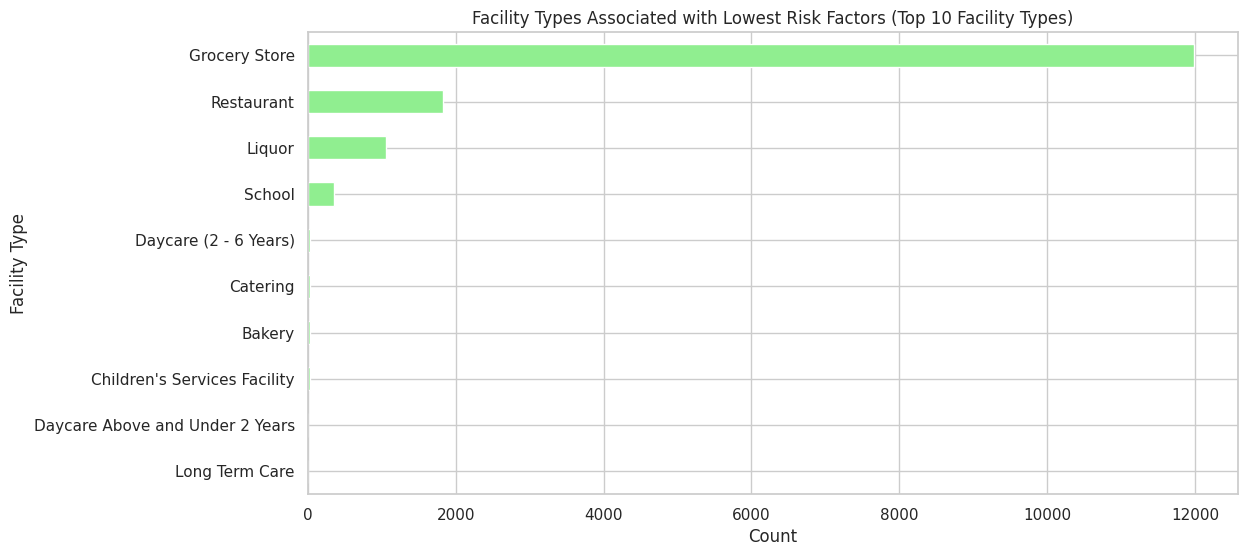

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Identify the most common facility type
plt.figure(figsize=(12, 6))
common_facility_types = df['Facility Type'].value_counts().nlargest(10)
sns.barplot(x=common_facility_types.values, y=common_facility_types.index, palette="viridis")
plt.title('Top 10 Most Common Facility Types')
plt.xlabel('Count')
plt.ylabel('Facility Type')
plt.show()

# Extract top 10 facility types
top_10_facility_types = common_facility_types.index

# Identify facility types associated with highest risk factors (for top 10 facility types)
plt.figure(figsize=(12, 6))
high_risk_facility_types = df[df['Facility Type'].isin(top_10_facility_types)].groupby('Facility Type')['Risk'].value_counts().unstack().fillna(0)
high_risk_facility_types['Risk 1 (High)'].sort_values().plot(kind='barh', color='salmon')
plt.title('Facility Types Associated with Highest Risk Factors (Top 10 Facility Types)')
plt.xlabel('Count')
plt.ylabel('Facility Type')
plt.show()

# Identify facility types associated with lowest risk factors (for top 10 facility types)
plt.figure(figsize=(12, 6))
low_risk_facility_types = df[df['Facility Type'].isin(top_10_facility_types)].groupby('Facility Type')['Risk'].value_counts().unstack().fillna(0)
low_risk_facility_types['Risk 3 (Low)'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Facility Types Associated with Lowest Risk Factors (Top 10 Facility Types)')
plt.xlabel('Count')
plt.ylabel('Facility Type')
plt.show()


Working on "Restaurants" Facility type.

Considering "Pass w/ Conditions" to "Fail" for only Restaurants Facility type. As, we cannot say it is completely passed the inspection.

In [ ]:
# Get unique values in the "Results" column
results_unique = df['Results'].unique()

# Print the unique values
print("Unique Results:", results_unique)

# Considering Pass w/ Conditions into Pass for rows where Facility Type is "Restaurant"
df.loc[df['Facility Type'] == 'Restaurant', 'Results'] = df.loc[df['Facility Type'] == 'Restaurant', 'Results'].replace('Pass w/ Conditions', 'Fail')

# Verify the changes
print("Unique Results after replacement:", df['Results'].unique())

Unique Results: ['Pass' 'Not Ready' 'Fail' 'Out of Business' 'No Entry'
 'Pass w/ Conditions' 'Business Not Located']
Unique Results after replacement: ['Pass' 'Not Ready' 'Fail' 'Out of Business' 'No Entry'
 'Pass w/ Conditions' 'Business Not Located']


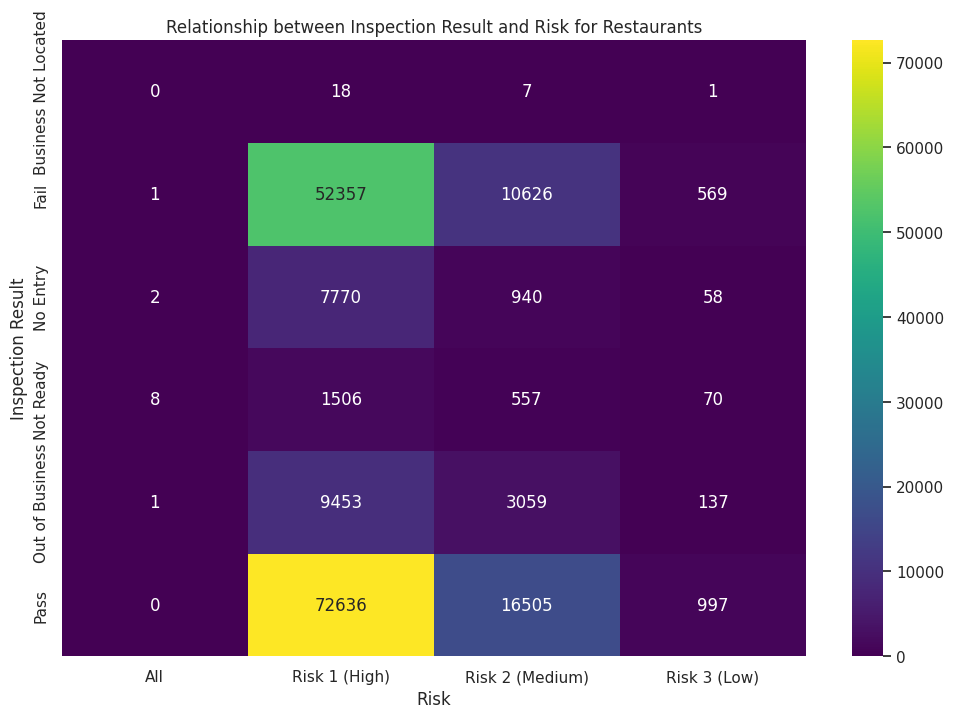

In [ ]:
# Create a subset of the data for the top facility type (e.g., 'Restaurant')
restaurant_data = df[df['Facility Type'] == 'Restaurant']

# Create a cross-tabulation of Facility Type, Inspection Result, and Risk
cross_tab = pd.crosstab(restaurant_data['Results'], restaurant_data['Risk'])

# Plot a heatmap to visualize the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Inspection Result and Risk for Restaurants')
plt.xlabel('Risk')
plt.ylabel('Inspection Result')
plt.show()


1. Restaurants are the most frequently inspected facility type by the inspection team.

2. High Risk is consistently observed in the Restaurants facility type.

3. Despite an approximately equal likelihood of receiving either a Pass or Fail result during inspections, it's noteworthy that high-risk levels persist even when inspection results indicate a Pass.


# Geo-spacial Analysis

In [6]:


import pandas as pd
import folium
from IPython.core.display import HTML


# Function to add markers for a given risk level and color
def add_markers(map_obj, data, color):
    for index, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['DBA Name']} - {row['Risk']}",
            icon=folium.Icon(color=color)
        ).add_to(map_obj)

# Filter data for each risk level and remove rows with missing latitude or longitude
high_risk_data = df[df['Risk'] == 'Risk 1 (High)'].dropna(subset=['Latitude', 'Longitude'])
medium_risk_data = df[df['Risk'] == 'Risk 2 (Medium)'].dropna(subset=['Latitude', 'Longitude'])
low_risk_data = df[df['Risk'] == 'Risk 3 (Low)'].dropna(subset=['Latitude', 'Longitude'])

high_risk_data = high_risk_data.head(5000)
medium_risk_data = medium_risk_data.head(5000)
low_risk_data = low_risk_data.head(5000)


# Create a folium map centered around a general average location
avg_lat = df['Latitude'].mean()
avg_lon = df['Longitude'].mean()
inspection_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Add markers for each risk level
add_markers(inspection_map, high_risk_data, 'red')    # Red for high risk
add_markers(inspection_map, medium_risk_data, 'orange')  # Orange for medium risk
add_markers(inspection_map, low_risk_data, 'yellow')   # Yellow for low risk

# Save the map as an HTML file
inspection_map.save("risk_level_inspections_map_1.html")

File Saved


# Time Series Analysis

In [ ]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

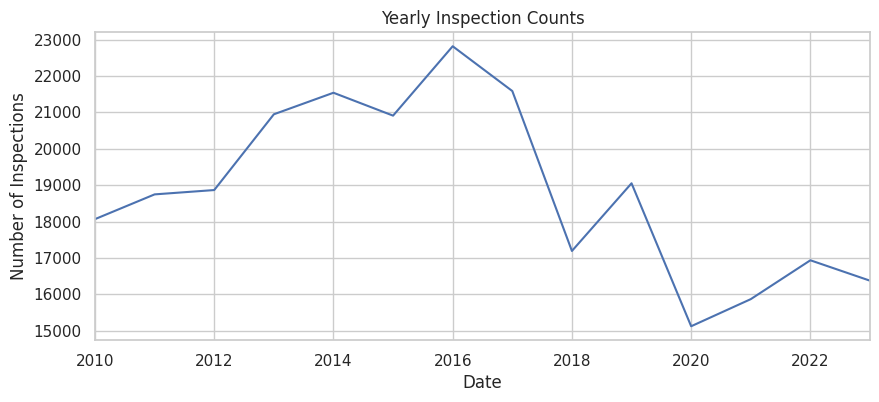

In [ ]:
yearly_counts = df.resample('Y').size()

# Plotting
plt.figure(figsize=(10, 4))
yearly_counts.plot(title='Yearly Inspection Counts')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
plt.show()


**Observation 1:** The Frequency of Inspections getting reduced gradually from 2016

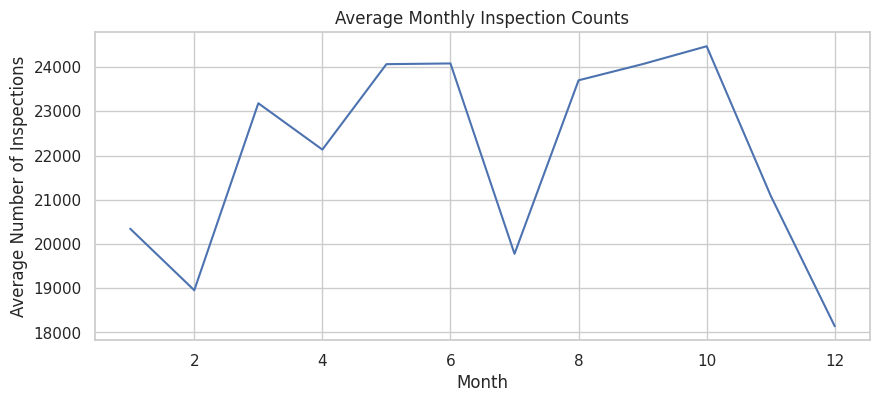

In [ ]:
monthly_mean = df.groupby(df.index.month)['Inspection ID'].count()

# Plotting
plt.figure(figsize=(10, 4))
monthly_mean.plot(title='Average Monthly Inspection Counts')
plt.xlabel('Month')
plt.ylabel('Average Number of Inspections')
plt.show()


**Observation 2:** Inspection counts are getting reduced during Winter (Nov, Dec, Jan, Feb)

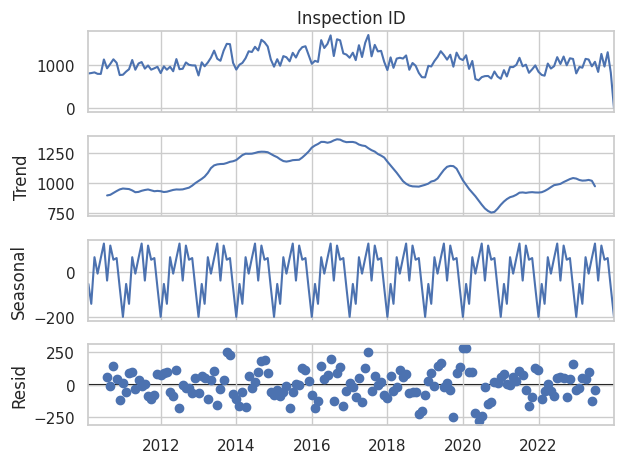

In [ ]:
# Assuming 'Inspection Date' is already in DateTime format
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

# Filter data for Restaurants
restaurant_data = df[df['Facility Type'] == 'Restaurant']

# Calculate inspection frequency
inspection_frequency = restaurant_data.resample('M')['Inspection ID'].count()

# Total number of inspections for restaurants
total_inspections = restaurant_data['Inspection ID'].count()

# Display results in a table
inspection_table = pd.DataFrame({
    'Time Interval': inspection_frequency.index,
    'Inspection Frequency': inspection_frequency.values,
    'Percentage of Total': (inspection_frequency / total_inspections * 100).values
})

print(inspection_table)

In [ ]:
df.set_index('Inspection Date', inplace=True)
restaurant_data = df[df['Facility Type'] == 'Restaurant']

monthly_counts = restaurant_data.resample('M').size()
weekly_counts = restaurant_data.resample('W').size()

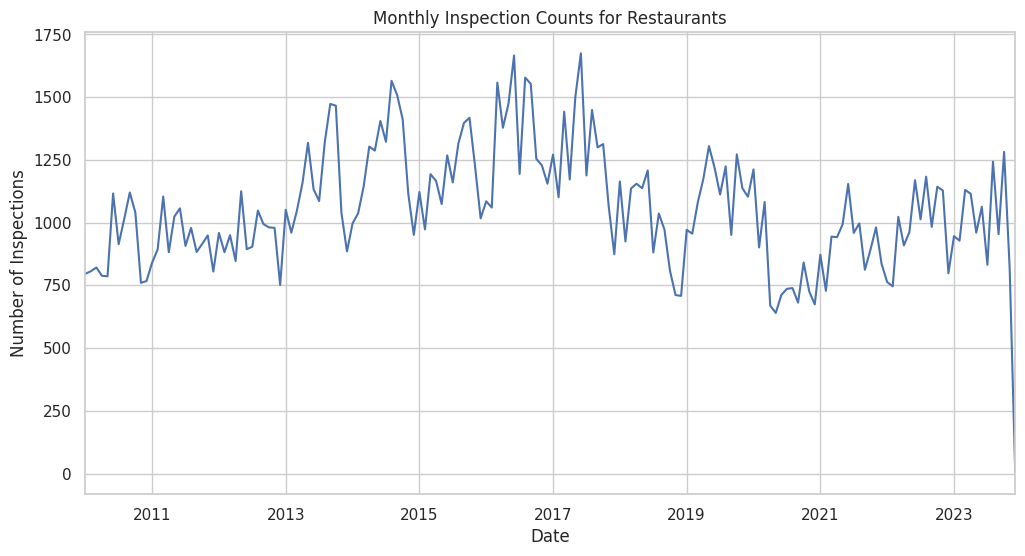

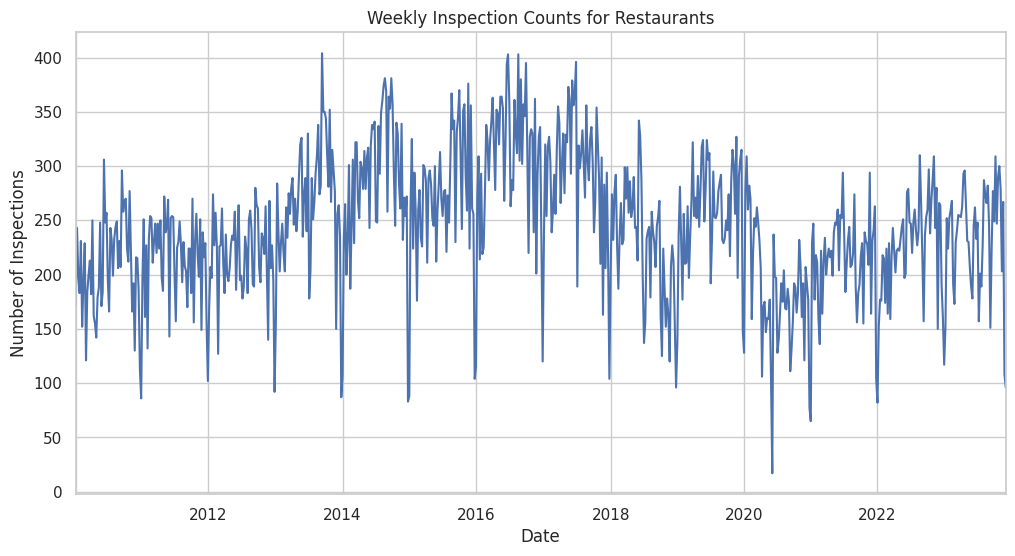

In [ ]:
plt.figure(figsize=(12, 6))
monthly_counts.plot(title='Monthly Inspection Counts for Restaurants')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
plt.show()

plt.figure(figsize=(12, 6))
weekly_counts.plot(title='Weekly Inspection Counts for Restaurants')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
plt.show()


In [ ]:
Current_monthly_count = monthly_counts.mean()
Current_weekly_count = weekly_counts.mean()

In [ ]:
# Print Suggestions in a Box
print("+" + "-" * 30 + "+")
print("| Average Inspection Counts |")
print("+" + "-" * 30 + "+")
print(f"| Monthly: {Current_monthly_count:<22.2f} |")
print(f"| Weekly : {Current_weekly_count:<22.2f} |")
print("+" + "-" * 30 + "+")

+------------------------------+
| Average Inspection Counts |
+------------------------------+
| Monthly: 1055.26                |
| Weekly : 244.19                 |
+------------------------------+


**Observation 3:** Average number of Inspections happening in a month and the week in Restaurants are:


*   Monthly Average Inspections - 1055
*   Weekly Average Inspections - 244



Investigating the Correlation between Top 10 Facility Types, Inspection Types and Risk Level

Facility Type vs. Risk:
Risk                             All  Risk 1 (High)  Risk 2 (Medium)  \
Facility Type                                                          
Bakery                             0           1566             2216   
Catering                           0           1572               39   
Children's Services Facility       0           5555                1   
Daycare (2 - 6 Years)              0           3075               16   
Daycare Above and Under 2 Years    0           3495                9   
Grocery Store                      7          10329            10606   
Liquor                             0             23               55   
Long Term Care                     0           1946                0   
Restaurant                        12         143740            31694   
School                             0          15187             1085   

Risk                             Risk 3 (Low)  
Facility Type                                  
Bakery         

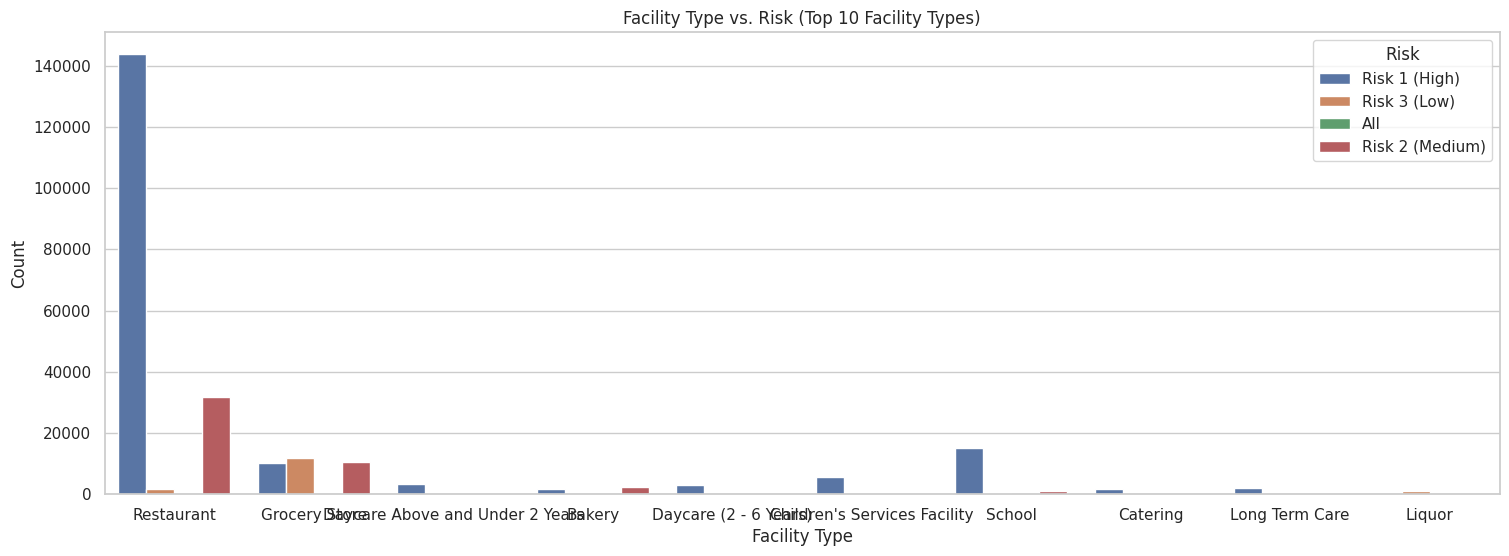

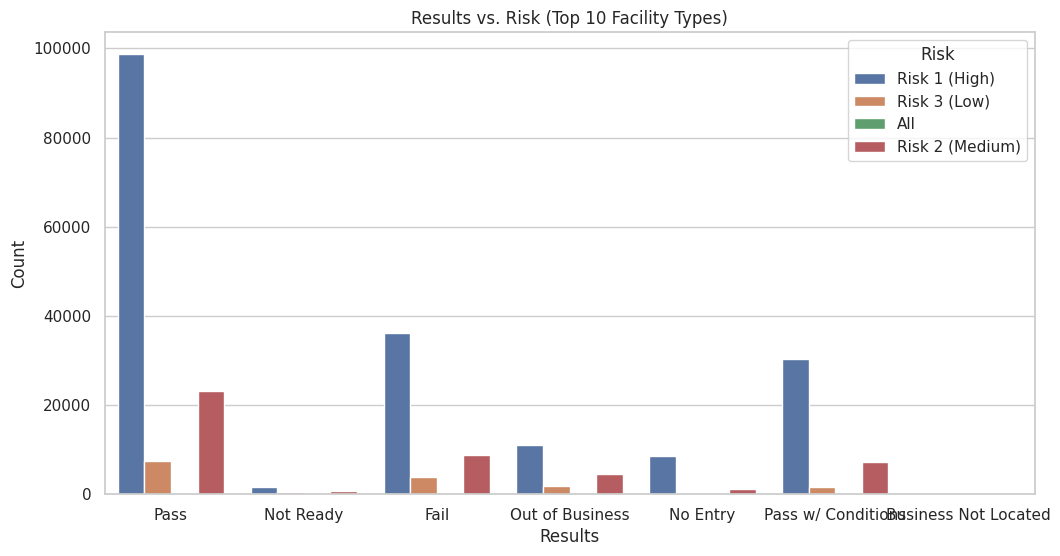

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


# 'top_10_facility_types' is the variable containing the top 10 facility types from the above code

# Filter data for the top 10 facility types
df_top_10_facility = df[df['Facility Type'].isin(top_10_facility_types)]

# Cross-Tabulation for Facility Type vs. Risk
facility_risk_cross_tab = pd.crosstab(df_top_10_facility['Facility Type'], df_top_10_facility['Risk'])

# Cross-Tabulation for Results vs. Risk
results_risk_cross_tab = pd.crosstab(df_top_10_facility['Results'], df_top_10_facility['Risk'])

# Function to calculate Cramér's V
def cramers_v_contingency(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Calculate Cramér's V for Facility Type and Risk
facility_risk_cramer_v = cramers_v_contingency(facility_risk_cross_tab)

# Calculate Cramér's V for Results and Risk
results_risk_cramer_v = cramers_v_contingency(results_risk_cross_tab)

print("Facility Type vs. Risk:")
print(facility_risk_cross_tab)
print(f"Cramér's V for Facility Type vs. Risk: {facility_risk_cramer_v:.4f}")

print("\nResults vs. Risk:")
print(results_risk_cross_tab)
print(f"Cramér's V for Results vs. Risk: {results_risk_cramer_v:.4f}")

# Visualize associations with stacked bar charts
plt.figure(figsize=(18, 6))
sns.countplot(x='Facility Type', hue='Risk', data=df_top_10_facility)
plt.title('Facility Type vs. Risk (Top 10 Facility Types)')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Results', hue='Risk', data=df_top_10_facility)
plt.title('Results vs. Risk (Top 10 Facility Types)')
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()


**Observation:**

--> Restaurants has the High Risk factor at the same time, the pass % is also more





Types of Violations Recorded and their freqency

Unique Violations: [nan
 '60. PREVIOUS CORE VIOLATION CORRECTED - Comments: 8-404.13(B:4) FOUND CONTINUED NON- COMPLIANCE FROM INSPECTION REPORT #2560764 CONDUCTED ON JULY 14, 2022. THE FOLLOWING PREVIOUS CORE VIOLATIONS WERE NOT CORRECTED 6-202.15 OBSERVED THE REVOLVING ENTRANCE DOOR NOT RODENT PROOFED WITH A ONE INCH GAP AT THE BOTTOM. INSTRUCTED TO MAKE SAID REVOLVING ENTRANCE DOOR TIGHT FITTING AND RODENT PROOFED. INSTRUCTED MANAGER TO COMPLY . PRIORITY FOUNDATION VIOLATION. 7-42-090. '
 '49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Comments: OBSERVED GREASE AT THE BOTTOM OF THE FRYER INSTRUCTED TO CLEAN AREA. THE EXTERIOR SURFACES OF THE FRYER AND STOVE NEED CLEANING; INSTRUCTED TO CLEAN. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: INSTRUCTED TO CLEAN THE FLOOR UNDER COOKING EQUIPMENT WHERE NEEDED. | 57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING - Comments: INSTRUCTED THAT ALL NEW FOOD HANDLERS MUST OBTAIN THE REQUIRED FOOD HANDLER TRAINING. | 58. ALLERGE

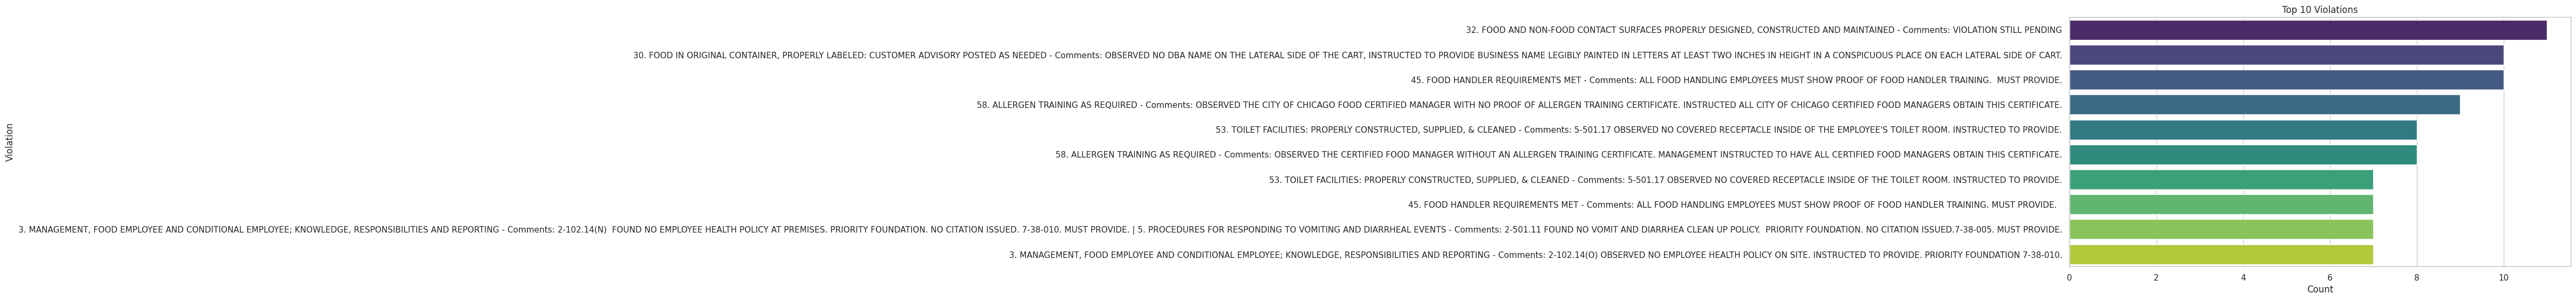

In [ ]:
# Check unique values in the 'Violations' column
unique_violations = df['Violations'].unique()

# Explore the distribution of violations
violations_counts = df['Violations'].value_counts().sort_values(ascending=False)

# Display the most frequent violations
top_violations = violations_counts.head(10)

# Print unique violations and their counts
print("Unique Violations:", unique_violations)
print("\nTop 10 Violations:")
print(top_violations)

# Visualize the distribution of violations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_violations.values, y=top_violations.index, palette="viridis")
plt.title('Top 10 Violations')
plt.xlabel('Count')
plt.ylabel('Violation')
plt.show()


Common Violation type recorded in Restaurents

Unique Violations in Restaurants: [nan
 '60. PREVIOUS CORE VIOLATION CORRECTED - Comments: 8-404.13(B:4) FOUND CONTINUED NON- COMPLIANCE FROM INSPECTION REPORT #2560764 CONDUCTED ON JULY 14, 2022. THE FOLLOWING PREVIOUS CORE VIOLATIONS WERE NOT CORRECTED 6-202.15 OBSERVED THE REVOLVING ENTRANCE DOOR NOT RODENT PROOFED WITH A ONE INCH GAP AT THE BOTTOM. INSTRUCTED TO MAKE SAID REVOLVING ENTRANCE DOOR TIGHT FITTING AND RODENT PROOFED. INSTRUCTED MANAGER TO COMPLY . PRIORITY FOUNDATION VIOLATION. 7-42-090. '
 '49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Comments: OBSERVED GREASE AT THE BOTTOM OF THE FRYER INSTRUCTED TO CLEAN AREA. THE EXTERIOR SURFACES OF THE FRYER AND STOVE NEED CLEANING; INSTRUCTED TO CLEAN. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: INSTRUCTED TO CLEAN THE FLOOR UNDER COOKING EQUIPMENT WHERE NEEDED. | 57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING - Comments: INSTRUCTED THAT ALL NEW FOOD HANDLERS MUST OBTAIN THE REQUIRED FOOD HANDLER TRAINING

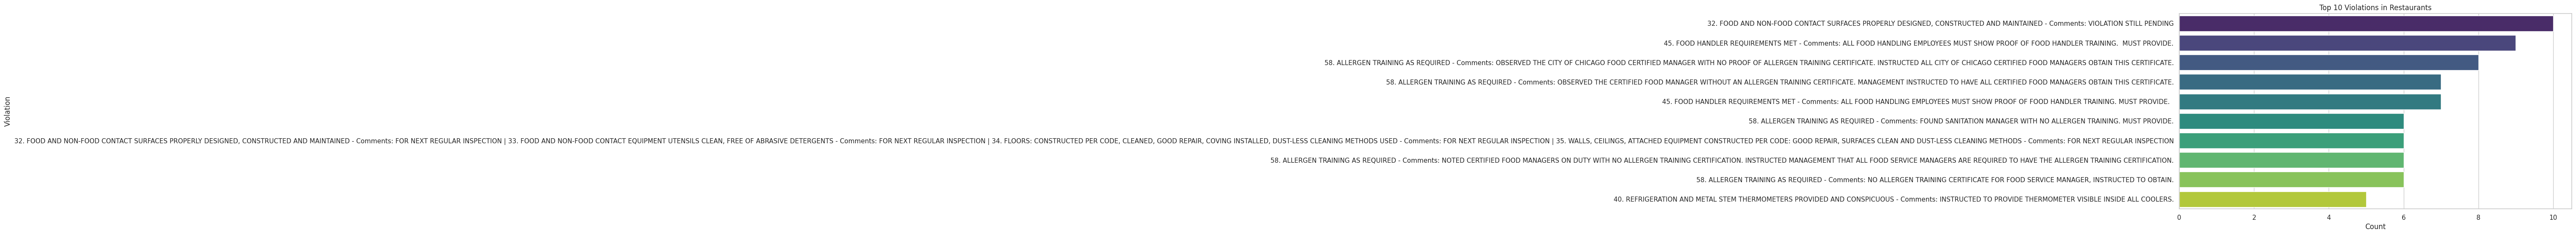

In [ ]:
# Filter data for the "Restaurant" facility type
restaurant_data = df[df['Facility Type'] == 'Restaurant']

restaurant_data['Truncated Violations'] = restaurant_data['Violations'].str.extract(r'(\d+\.[^\.]+)')

# Check unique values in the 'Violations' column for restaurants
unique_violations_restaurant = restaurant_data['Violations'].unique()


# Explore the distribution of violations for restaurants
violations_counts_restaurant = restaurant_data['Violations'].value_counts().sort_values(ascending=False)

# Display the most frequent violations for restaurants
top_violations_restaurant = violations_counts_restaurant.head(10)

# Print unique violations and their counts for restaurants
print("Unique Violations in Restaurants:", unique_violations_restaurant)
print("\nTop 10 Violations in Restaurants:")
print(top_violations_restaurant)

# Visualize the distribution of violations for restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x=top_violations_restaurant.values, y=top_violations_restaurant.index, palette="viridis")
plt.title('Top 10 Violations in Restaurants')
plt.xlabel('Count')
plt.ylabel('Violation')
plt.show()
